<h1>Analysis of IT student performance factors

## Summary

>>[Summary](#scrollTo=cq0FdZpslt43)

>[Introduction](#scrollTo=pwrnQgzMZmE3)

>[Development](#scrollTo=N5c8KiTlZrfr)

>>[2.1 Importing libraries](#scrollTo=YBdgy3YnokoR)

>>[2.2 Reading the open data from http://dados.ufrn.br](#scrollTo=lGPX0vNHo2CN)

>>>[2.2.1 Taking the CSV's links](#scrollTo=yXvc4EIr_3LW)

>>>[2.2.2 Chosing the columns](#scrollTo=2LpAq85GAGSp)

>>>[2.2.3 Reading the CSV's](#scrollTo=4ldXy8yCARcw)

>>[2.3 Data preparation](#scrollTo=WaWVj6Mmo-HW)

>>>[2.3.1 Classes](#scrollTo=93yuWpAoAglC)

>>>[2.3.2 Grades](#scrollTo=Xf1WbhSYA6Pw)

>>>[2.3.3 Subjects](#scrollTo=aO8yMenaBAvt)

>>>[2.3.4 Teachers](#scrollTo=QEQvPYXQ20Rk)

>>[2.4 Doing the merge and the concatenation of the dataframes](#scrollTo=qmowYvevpKjB)

>>>[2.4.1 Concatenation of all classes](#scrollTo=K30N2Rp90r20)

>>>[2.4.2 Concatenation of all grades](#scrollTo=-bpdbJPe3r43)

>>>[2.4.3 Merge: Classes -> Subjects](#scrollTo=SZRXZ7ZtO1WC)

>>>[2.4.4 Merge: Teachers ->[ Classes -> Subjects ]](#scrollTo=uymsvT0z8_He)

>>>[2.4.5 Merge: Grades -> [ Teachers -> Classes -> Subjects]](#scrollTo=5f_7eBQ1RS7x)

>>[2.5 Study](#scrollTo=vdLUPMpnc14Q)

>>>[2.5.1 Initial view of the data](#scrollTo=y-O2PheV43g0)

>>>>[Viewing students yield through years by subject](#scrollTo=8fBAV3YBOS92)

>>>>[Viewing yield over the periods](#scrollTo=m1Q71-nyHDSL)

>>>>[Students' situation  through periods](#scrollTo=OoWID8V-hp63)

>>>[2.5.2 Number of students by class](#scrollTo=st-NaCHnEuKO)

>>>[2.5.3 Class shift](#scrollTo=HSPUrOQ_HKLa)

>>>[2.5.4 Teacher's experience](#scrollTo=Y6XGf-ORHZ5q)

>>>[2.5.5 Departament offering the class.](#scrollTo=cMVoIShAHiIm)

>>>[2.5.6 Student absences](#scrollTo=1kd9TQwpIBu2)

>>>>[Number of students](#scrollTo=6lKL9-p3u3XY)

>>>>[Absences by interval](#scrollTo=C36Ijj2tzebq)

>>>>[Absences by subjects](#scrollTo=7OoRSj4YzwEQ)

>[Conclusion](#scrollTo=PhxH5ubeavkZ)



# 1. Introduction


The exploratory analysis of data and its visual representations encompasses a set of quantitative and graphical techniques that allow us to discover trends, detect behaviors, test the validity of hypotheses and make several studies.

For this analysis, we will use the data provided by the <a href='http://dados.ufrn.br'>Open Data Portal</a>  of the ** Federal University of Rio Grande do Norte (UFRN)** and we will investigate possible factors that influence the performance of the students of the ** Bachelor's degree in Information Technology (IT) **.

Thus, some questions that will be the basis for our study can be raised:

* How has the students achievement been over the years?
* Does the class configuration affect this performance?
* Do teachers also influence in any way?
* Is there a place where the classes yield is higher?
* And finally, does the student himself have any interference?

And seeking to answer these questions that, throughout this notebook, we will generate graphs and tables that relate the students average and the number of students approved and disapproved **from 2014.1 to 2017.2** with elements such as:
* The number of students per class;
* The class shift;
* The year of admission of the teacher;
* The department that offers the class; 
  1.   <a href='https://portal.imd.ufrn.br/portal/'>Instituto Métropole Digital (IMD)</a>
  2.   <a href='https://sigaa.ufrn.br/sigaa/public/departamento/portal.jsf?id=125'>Departamento de Informática e Matemática Aplicada (DIMAp)</a>
* And the amount of student absences.

# 2. Development

Here we are going to import needed librarys, take the needed links from the open data, choose the necessary columns and read each CSV so we can have a initial data to work with. After that we will clean the data and prepare them to merge into a single pandas dataframe that allows us to have a easier manipulation of it. And then,  when the cleaning and the merges are done, we will start the study over the yield of the students based on what was covered in the introduction.

## 2.1 Importing libraries

In [0]:
# These are the library we are going to use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2.2 Reading the open data from http://dados.ufrn.br

### 2.2.1 Taking the CSV's links 

For the analysis we will need four different dataframes that are related to:

1. <a href='http://dados.ufrn.br/dataset/turmas'>Classes</a>
2. <a href='http://dados.ufrn.br/dataset/matriculas-componentes'>Grades </a>
3. <a href='http://dados.ufrn.br/dataset/componentes-curriculares'>Subjects</a>
4. <a href='http://dados.ufrn.br/dataset/docentes'>Teachers</a>

And we will have to read each one separately, and as we want to analyse the data from 2014 to 2017.2 , we will need to read the classes and grades of each year separately too.

In [0]:
# Classes
# Reading the data directly from the portal
classes_url = ['http://bit.do/turmas_ufrn_2014_1','http://bit.do/turmas_ufrn_2014_2',
              'http://bit.do/turmas_ufrn_2015_1','http://bit.do/turmas_ufrn_2015_2',
              'http://bit.do/turmas_ufrn_2016_1','http://bit.do/turmas_ufrn_2016_2',
              'http://bit.do/turmas_ufrn_2017_1','http://bit.do/turmas2017_2']

''' 
# Reading the data in case we have them downloaded as csv
classes_url = ['Turmas/turmas_2014.1.csv', 'Turmas/turmas_2014.2.csv',
             'Turmas/turmas_2015.1.csv', 'Turmas/turmas_2015.2.csv',
             'Turmas/turmas_2016.1.csv', 'Turmas/turmas_2016.2.csv',
             'Turmas/turmas_2017.1.csv', 'Turmas/turmas_2017.2.csv']
'''

# Grades with students
grades_url = ['http://bit.do/notas_ufrn_2014_1','http://bit.do/notas_ufrn_2014_2',
             'http://bit.do/notas_ufrn_2015_1','http://bit.do/notas_ufrn_2015_2',
             'http://bit.do/notas_ufrn_2016_1','http://bit.do/notas_ufrn_2016_2',
             'http://bit.do/notas_ufrn_2017_1','http://bit.do/notas2017_2']
'''
grades_url = ['Matriculas/matriculas_2014.1.csv', 'Matriculas/matriculas_2014.2.csv',
            'Matriculas/matriculas_2015.1.csv', 'Matriculas/matriculas_2015.2.csv',
            'Matriculas/matriculas_2016.1.csv', 'Matriculas/matriculas_2016.2.csv',
            'Matriculas/matriculas_2017.1.csv', 'Matriculas/matriculas_2017.2.csv']
'''

# Curricular components
subjects_url = 'http://bit.do/componentes_curriculares_ufrn'

# Teachers
teachers_url = 'http://bit.do/docentes_ufrn_2018'

### 2.2.2 Chosing the columns 

To make it easier to clean and manipulate the data, before reading the CSV's,  it is important to define the columns that we will use of each dataframe.

In [0]:
# Classes Columns
ClassesColumns = ['id_turma', 'codigo_turma', 'id_docente_interno', 
                'id_docente_externo', 'nivel_ensino','ano', 'periodo', 
                'descricao_horario', 'total_solicitacoes', 'capacidade_aluno', 
                'modalidade_participantes', 'id_componente_curricular', 'situacao_turma']

ClassesColumnsEnglish = ['class_id', 'class_code', 'interne_teacher_id', 
                'externe_teacher_id', 'teaching_level','year', 'semester', 
                'schedule_description', 'total_requests', 'student_capacity', 
                'modality_participants', 'curricular_component_id', 'class_situation']

# Grades Columns
GradesColumns = ['id_turma', 'discente', 'id_curso', 'nota', 'reposicao',
                 'media_final', 'numero_total_faltas', 'descricao']

GradesColumnsEnglish = ['class_id', 'student', 'course_id', 'grade', 'replacement',
                        'final_average', 'total_number_of_absences', 'description']

# Subjects Columns
SubjectsColumns = ["id_componente","codigo","nivel","nome","unidade_responsavel"]

SubjectsColumnsEnglish = ["component_id","cod","level","name_subject","responsible_unit"]

# Teachers Columns
TeachersColumns = ['id_servidor', 'nome', 'lotacao', 'admissao']

TeachersColumnsEnglish = ['server_id', 'server_name', 'unity', 'admission']

### 2.2.3 Reading the CSV's

In [0]:
# Classes since 2014.1 until 2017.2
class2014_1 = pd.read_csv(classes_url[0], sep=';', usecols = ClassesColumns)
class2014_2 = pd.read_csv(classes_url[1], sep=';', usecols = ClassesColumns)
class2015_1 = pd.read_csv(classes_url[2], sep=';', usecols = ClassesColumns)
class2015_2 = pd.read_csv(classes_url[3], sep=';', usecols = ClassesColumns)
class2016_1 = pd.read_csv(classes_url[4], sep=';', usecols = ClassesColumns)
class2016_2 = pd.read_csv(classes_url[5], sep=';', usecols = ClassesColumns)
class2017_1 = pd.read_csv(classes_url[6], sep=';', usecols = ClassesColumns)
class2017_2 = pd.read_csv(classes_url[7], sep=';', usecols = ClassesColumns)

In [0]:
# Grades of the students since 2014.1 until 2017.2
grades2014_1 = pd.read_csv(grades_url[0], sep=';', usecols = GradesColumns)
grades2014_2 = pd.read_csv(grades_url[1], sep=';', usecols = GradesColumns)
grades2015_1 = pd.read_csv(grades_url[2], sep=';', usecols = GradesColumns)
grades2015_2 = pd.read_csv(grades_url[3], sep=';', usecols = GradesColumns)
grades2016_1 = pd.read_csv(grades_url[4], sep=';', usecols = GradesColumns)
grades2016_2 = pd.read_csv(grades_url[5], sep=';', usecols = GradesColumns)
grades2017_1 = pd.read_csv(grades_url[6], sep=';', usecols = GradesColumns)
grades2017_2 = pd.read_csv(grades_url[7], sep=';', usecols = GradesColumns)

In [0]:
# Curricular components
Original_Subjects_Data = pd.read_csv(subjects_url, sep=';', usecols = SubjectsColumns)

In [0]:
# Teachers
Original_Teachers_Data = pd.read_csv(teachers_url, sep=';', usecols = TeachersColumns)

## 2.3 Data preparation

Now we will prepare the data for the merge and for this we need to filter the data to BTI, ensure that the dataframe types and names match, translate the columns into English and change the format of some data.


### 2.3.1 Classes

Here we are going to:
    
1.    Change the type of some columns
2.    Filter the dataframe to only what is necessary
3.  Fix the columns interne/externe_teacher_id to join them into one column
4.  Fix the column schedule_description
5.  Fix the dataframe from 2014.2







In [0]:
# Setting priginal data into one vector due to easier manipulation
Original_Classes_Data = [class2014_1, class2014_2, class2015_1, class2015_2,
                         class2016_1, class2016_2, class2017_1, class2017_2]

# Setting classes as a copy from Original_Classes_Data
classes = Original_Classes_Data

In [0]:
# Renaming all columns from the dataframe to english
for i in range(8):
  for col_id in range(len(ClassesColumnsEnglish)):
    classes[i].rename(columns={ClassesColumns[col_id]:ClassesColumnsEnglish[col_id]}, inplace=True)

In [0]:
# Defining the necessary columns 
cols = ['class_id', 'class_code', 'interne_teacher_id', 'externe_teacher_id',
        'teaching_level','year', 'semester', 'schedule_description',
        'total_requests', 'student_capacity', 'modality_participants',
        'component_id', 'class_situation']

for i in range(8):
  # Component_id columns must have the same name in both dataframes, so we can do the merge
  classes[i].rename(columns={'curricular_component_id': 'component_id'}, inplace=True)
  
  # Changing some columns types in this step
  classes[i].component_id = classes[i].component_id.astype(str)
  classes[i].interne_teacher_id = classes[i].interne_teacher_id.astype(str)
  classes[i].externe_teacher_id = classes[i].externe_teacher_id.astype(str)
  classes[i].class_id = classes[i].class_id.astype(str)
  classes[i].schedule_description = classes[i].schedule_description.astype(str)

  # Filtering by the classes that are presential, from graduation and have been consolidated
  classes[i] = classes[i][classes[i]['modality_participants']=="Presencial"]
  classes[i] = classes[i][classes[i]['teaching_level']=='GRADUAÇÃO']
  classes[i] = classes[i][classes[i]['class_situation']=='CONSOLIDADA']
  
  # Filtering by the columns defined at the begining
  classes[i] = classes[i][cols]
  
  # Removing all NaN from the columns 'interne_teacher_id' and 'externe_teacher_id'
  classes[i].externe_teacher_id = classes[i].externe_teacher_id.replace('nan','')
  classes[i].interne_teacher_id = classes[i].interne_teacher_id.replace('nan','')
  
  # Joining both columns of teachers_id into one 
  classes[i]['teacher_id'] = classes[i]['interne_teacher_id'] + classes[i]['externe_teacher_id']

In [0]:
# The column schedule_description has the date of when it was taught, but that date it's not that important
# So we are leaving in each class dataframe schedule_description column only what is necessary
def splitSchedule(row):
    return row['schedule_description'].split('(')[0]

for i in range(8):
    classes[i]['schedule_description'] = classes[i].apply(splitSchedule, axis=1)

In [0]:
# For some reason, the class2014_2 has component_id type as float, and we want to remove .0 
classes[1]['component_id'] = classes[1]["component_id"].astype(str)

def splitComponentID(row):
    return row['component_id'].split('.0')[0]

classes[1]['component_id'] = classes[1].apply(splitComponentID, axis = 1)

# The class2014_2 also has columns that have different types than other dataframes
classes[1].semester = classes[1].semester.astype(int)
classes[1].year = classes[1].year.astype(int)

### 2.3.2 Grades

Here we are going to:
1. Create three new columns we will use later
2. Exclude columns that are no longer needed

In [64]:
# Placing the original data from grades into a vector for the same reason we did it before with classes
original_Grades = [grades2014_1, grades2014_2, grades2015_1, grades2015_2,
                   grades2016_1, grades2016_2, grades2017_1, grades2017_2]
grades = original_Grades

# Defining the columns that we are going to use
cols = ['class_id', 'student', 'course_id', 'final_average', 
        'total_number_of_absences', 'description', 'year','semester', 'period']

# Adding year and period in each dataframe of grades
year = 2014 # The year we decide to start our study
for i in range(8):
  grades[i]['year'] = year
  if i%2==0:
    grades[i]['semester'] = 1
    grades[i]['period'] = year+0.0 # For better viewing in graphics
  else:
    grades[i]['semester'] = 2
    grades[i]['period'] = year+0.5 # For better viewing in graphics
    year += 1

# Renaming all columns from the dataframe to english
  for col_id in range(len(GradesColumnsEnglish)):
    grades[i].rename(columns={GradesColumns[col_id]:GradesColumnsEnglish[col_id]}, inplace=True)
  
# Filtering by the columns defined at the begining 
  grades[i] = grades[i][cols]
  
# Renaming the column for better manipulation
  grades[i].rename(columns={'total_number_of_absences': 'absences'}, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


### 2.3.3 Subjects

Here we are going to:
1.  Separate subjects from IMD and from DIMAp
2.  Concatenate these two dataframes into one

In [0]:
# Setting Subjects as copy of original_Subjects
subjects = Original_Subjects_Data

# Renaming the columns from subjects 
for i in range(len(SubjectsColumnsEnglish)):
  subjects.rename(columns={SubjectsColumns[i]:SubjectsColumnsEnglish[i]}, inplace=True)

# Leaving only graduation subjects from IMD and DIMAp
subjects = subjects[subjects['level']=='G']
d_dimap = subjects[subjects['responsible_unit'] == 'DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA']
d_imd = subjects[subjects['responsible_unit'] == 'INSTITUTO METROPOLE DIGITAL']

# Concatenating the dataframes
subjects = pd.concat([d_dimap, d_imd])
cols = ["component_id","cod","name_subject","responsible_unit"]
subjects = subjects[cols]


### 2.3.4 Teachers

Here we are going to:  
   1.  Separate  teachers from IMD and from DIMAp
   2.  Concatenate these two dataframes into one
   3.  Fix the column Admission

In [0]:
# Setting teachers as a copy of original_Teachers so we can manipulate safetly
teachers = Original_Teachers_Data

# Renaming the columns from teachers 
for i in range(len(TeachersColumnsEnglish)):
  teachers.rename(columns={TeachersColumns[i]:TeachersColumnsEnglish[i]}, inplace=True)

# Filtering from Teachers only those who gives class at IMD or DIMAp
d_imd = teachers[teachers.unity == "INSTITUTO METROPOLE DIGITAL"]
d_dimap = teachers[teachers.unity == "DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA"]

# Concatenating the dataframes
teachers = pd.concat([d_imd, d_dimap])

# Removing the columns that are not necessary anymore
cols = ["server_id","server_name","admission", "unity"]
teachers = teachers[cols]

# Applying a function that will leave into admission column only data in the format yyyy-mm-dd (year-month-day)
def splitAdmission(row):
    return row['admission'].split('-')[0]

teachers['admission'] = teachers.apply(splitAdmission, axis=1)

## 2.4 Doing the merge and the concatenation of the dataframes

In this section we are going merge all data we have into a single dataframe. To do that, we need to concatenate all classes into one and  all grades into one, and then merge all pandas dataframe we have.

### 2.4.1 Concatenation of all classes

In [0]:
# Concatenating all classes since 2014.1 until 2017.2
merge_classes = classes[0]
for i in range(1,8):
  merge_classes = pd.concat([merge_classes, classes[i]])

### 2.4.2 Concatenation of all grades

In [0]:
# Concatenating all grades since 2014.1 until 2017.2
merge_grades = grades[0]
for i in range(1,8):
  merge_grades = pd.concat([merge_grades, grades[i]])

### 2.4.3 Merge: Classes -> Subjects

In [0]:
# Defining the columns that are necessary
cols = ["class_id","class_code", "cod", "teacher_id","schedule_description","total_requests","year", "semester"
           ,"student_capacity","component_id", "name_subject"]

# Doing the merge between two dataframes (classes and subjects) using component_id as reference
merge_class_subjects = pd.merge(merge_classes, subjects, on='component_id')

# Leaving only the columns we need
merge_class_subjects = merge_class_subjects[cols]

# Changing the type of teacher_id to float so the merge can be completed
merge_class_subjects.teacher_id = merge_class_subjects.teacher_id.astype(float)

### 2.4.4 Merge: Teachers ->[ Classes -> Subjects ]

In [0]:
# Renaming the id_server to id_teacher so the merge can be done
teachers.rename(columns={'server_id':'teacher_id'}, inplace=True)

# Converting the id_teacher column to float
teachers.teacher_id = teachers.teacher_id.astype(float)

# Merging two dataframes (teachers and classes_subjects) on 'teacher_id'
merge_teac_cla_stu = pd.merge(merge_class_subjects, teachers, on='teacher_id')


### 2.4.5 Merge: Grades -> [ Teachers -> Classes -> Subjects]

In [0]:
# Converting some columns types so the merge can be done
merge_grades.class_id = merge_grades.class_id.astype(str)
merge_grades.semester = merge_grades.semester.astype(int)
merge_grades.year = merge_grades.year.astype(int)

In [0]:
# Doing the final merge between all dataframes using "class_Id", "year" and "semester" as reference
finalData = pd.merge(merge_teac_cla_stu, merge_grades, on=['class_id','year','semester'])

In [0]:
# Removing duplicated students in each class
classes_id = set(finalData.class_id)
cp_finalData = finalData
new_dt = pd.DataFrame()
  
for i in classes_id:
  # Auxiliar dataframe
  aux_dt = cp_finalData[cp_finalData.class_id == i] 
  aux_dt = aux_dt[~aux_dt.student.duplicated()]
  new_dt = pd.concat([new_dt, aux_dt])

finalData = new_dt

In [74]:
# Showing the final dataframe
finalData.head()

,class_id,class_code,cod,teacher_id,schedule_description,total_requests,year,semester,student_capacity,component_id,name_subject,server_name,admission,unity,student,course_id,final_average,absences,description,period
67775,57596656,01,DIM0610,24798.0,24M56,11,2017,1,40,52975,LÓGICA COMPUTACIONAL,REGIVAN HUGO NUNES SANTIAGO,2002,DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA,14542d2e5794c28be6a38a0f921d3229,92127264.0,6.1,0.0,APROVADO POR NOTA,2017.0
67778,57596656,01,DIM0610,24798.0,24M56,11,2017,1,40,52975,LÓGICA COMPUTACIONAL,REGIVAN HUGO NUNES SANTIAGO,2002,DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA,2a972fdb2041099e5328733757678e82,92127264.0,7.6,0.0,APROVADO,2017.0
67781,57596656,01,DIM0610,24798.0,24M56,11,2017,1,40,52975,LÓGICA COMPUTACIONAL,REGIVAN HUGO NUNES SANTIAGO,2002,DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA,480a730ca3e8657e4d203f06d6baaae1,92127264.0,6.2,0.0,APROVADO POR NOTA,2017.0
67784,57596656,01,DIM0610,24798.0,24M56,11,2017,1,40,52975,LÓGICA COMPUTACIONAL,REGIVAN HUGO NUNES SANTIAGO,2002,DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA,b620e62bf92155df6fdf8ff8820f7076,92127264.0,6.5,8.0,APROVADO POR NOTA,2017.0
67787,57596656,01,DIM0610,24798.0,24M56,11,2017,1,40,52975,LÓGICA COMPUTACIONAL,REGIVAN HUGO NUNES SANTIAGO,2002,DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA,9b475dd42613a111c6608052bf3ed567,92127264.0,6.0,8.0,APROVADO POR NOTA,2017.0


## 2.5 Study

Now that our data is prepared, we will start our analysis. For better understanding of  the codes, we suggest you to check some documentations:


1.   <a href='http://seaborn.pydata.org/tutorial.html'>Seaborn Tutorial</a> 
2. <a href='http://seaborn.pydata.org/generated/seaborn.FacetGrid.html?highlight=facet%20grid#seaborn.FacetGrid'>Seaborn.FacetGrid</a> 
3.   <a href='https://matplotlib.org/api/pyplot_summary.html'>Matplotlib Pyplot</a> 
4.   <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html'>Pandas.pivot_table</a> 
5.   <a href='https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.math.html'>Numpy Functions</a> 



### 2.5.1 Initial view of the data

Here we are going to answer the first question that we did at the introduction: How has the students yield been over the years?

####  Viewing students yield through years by subject

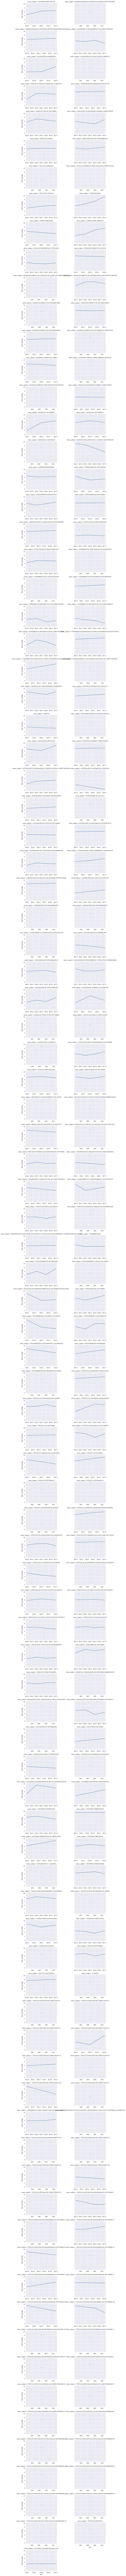

In [75]:
# Doing a pivot table to show final_average through years in each subject
yield_analysis = finalData.pivot_table(index = ["name_subject", "year"], values="final_average", aggfunc = np.mean)

# Tranforming the pivot_table into a dataframe
yield_analysis = yield_analysis.reset_index() 

# Creating graphics with Seaborn
average_subjects = sns.FacetGrid(yield_analysis, col = "name_subject", col_wrap=2, size=3, aspect=2, sharex=False)
average_subjects.map(plt.plot,"year", "final_average", marker = ".")  
plt.show()

<p> With these images we can see in which subjects the averages of the students has gone better and  has gone worse through years. And based on that we can clearly **identify the subjects that needs more attention** such as: 
  
*   Algoritmo e Programação de Computadores
*   Computabilidade
*   Fundamentos Matemáticos da Computação I
*   Fundamentos Matemáticos da Computação II
*   Fundamentos Matemáticos da Computação III
*   Grafos
*   Introdução a Sistemas de Controle
*   Linguagem de Programação I
*   Organização e Arquitetura de Computadores

And maybe, after this analysis, we can **try to increase the yield of them**, based in the results of it.


####Viewing yield over the periods

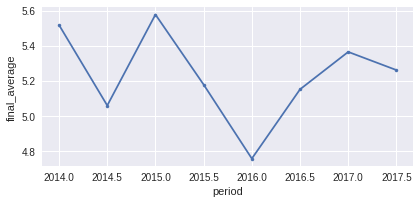

In [76]:
# Doing a pivot table to show final_average over the periods
initial_analysis_2 = finalData.pivot_table(index = "period", values="final_average", aggfunc = np.mean)

# Tranforming the pivot_table into a dataframe
initial_analysis_2 = initial_analysis_2.reset_index() 

# Creating a line plot with Seaborn and Matlplotlib
average_year = sns.FacetGrid(initial_analysis_2, size=3, aspect=2)
average_year.map(plt.plot,"period", "final_average", marker = ".")

The image above shows us that **the average of the students has not been so constant** through the years, with **a lot of increases and drops for each semester**. And when we compare the average from 2014.1 with the average from 2017.2, we can clearly see that the average from 2017.2 is lower. The same happened from 2015 to 2016, where the average has also dropped, but in this case it was an even bigger drop.  So another  goal  of this analysis is to generate a material that can help **reverting this scenario to a scenario where the student averages increses progressively.**

#### Students' situation  through periods

<p>To a better understanding: 

*   "Aprovado" means average greater than or equal to the university average (7.0)
*   "Aprovado por nota" means average greater than or equal to 5.0, but none of the grades is under 3.0
*   "Reprovado" means fail by grades
*   "Reprovado por média e por faltas" means fail by grades and absences
*    "Reprovado por faltas" means fail by absences

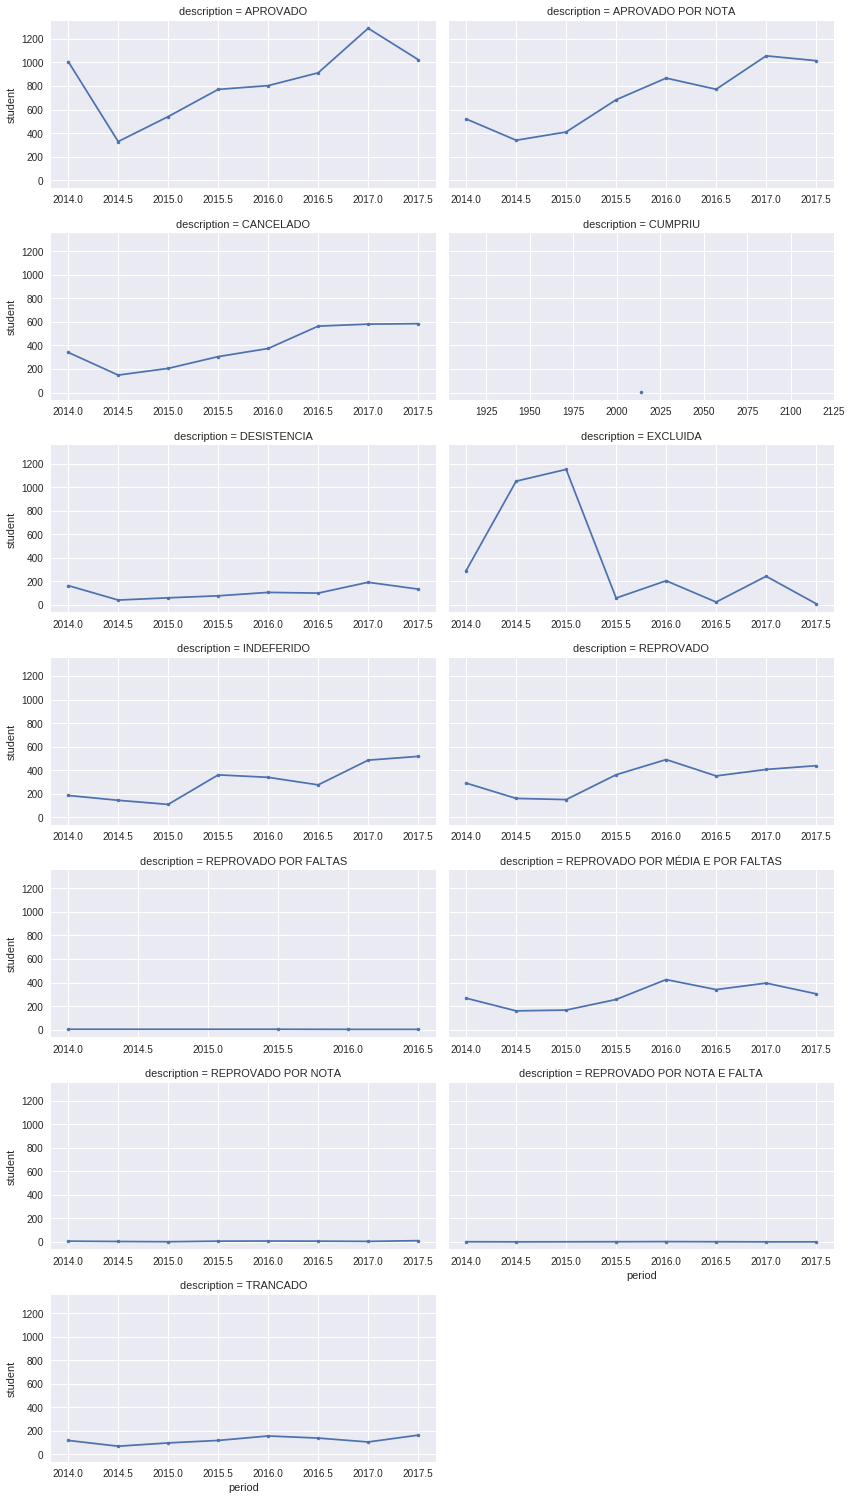

In [77]:
# Doing a pivot table to show the situation of the students through periods
initial_analysis_3 = finalData.pivot_table(index = ["period","description"], 
                                           values="student", aggfunc = "count")

# Tranforming the pivot_table into a dataframe
initial3 = initial_analysis_3.reset_index() 

# Creating line plots with Seaborn and Matplotlib
average_year_2 = sns.FacetGrid(initial3,col='description', 
                               col_wrap =2, size=3, aspect=2, sharex=False)
average_year_2.map(plt.plot,"period", "student", marker = ".")

In these images we see that, as well as the average, the students' situation varied considerably in each period. But if we look, again, only between 2014.1 and 2017.2, we will see that the number of approved by average remained almost the same, while the number of disapproved increased and the number of approved per grade increased further. This is not so good because it means that **the student performance** rather than becoming more excellent **is becoming more median and below average**.

### 2.5.2 Number of students by class

<p>Here we are going to analise if the number of students of a class can afect the final average of her students. To do that we separate classes by students' capacity. The function "which_capacity" is the one that separates them.

In [0]:
# Creating a Pivot table that relates the amount of students by class , and their grades
number_of_students = finalData.pivot_table(index='student_capacity',
                                           values= "final_average",
                                           aggfunc=np.mean)

# Creating a dataframe to plot
number_of_students = number_of_students.reset_index()

# Changing the type to avoid erros when we apply the function which_capacity
number_of_students.student_capacity = number_of_students.student_capacity.astype(int)

# Creating filters to "student_capacity" so we can improve de the visualization
def which_capacity(row):
    a = row['student_capacity']
    if a < 20:
        return 20
    elif a < 40:
        return 40
    elif a < 60:
        return 60
    elif a < 80:
        return 80
    elif a < 100:
        return 100
    else:
        return 120
      
number_of_students["capacity"] = number_of_students.apply(which_capacity, axis=1)

# Creating another pivot_table, but now with the filters
number_of_students_filtered = number_of_students.pivot_table(index='capacity', values="final_average", aggfunc=np.mean)

# Tranforming the pivot_table into a dataframe
number_of_students_filtered = number_of_students_filtered.reset_index()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


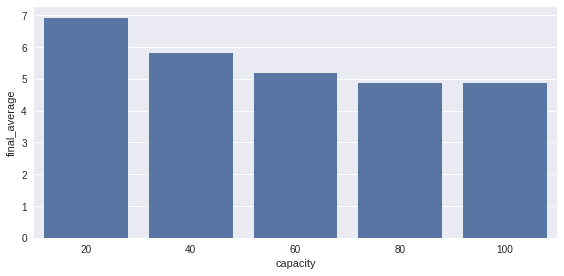

In [79]:
# Creating a bar plot with Seaborn 
students_by_class = sns.FacetGrid(number_of_students_filtered, size=4, aspect = 2)
students_by_class.map(sns.barplot,"capacity", "final_average") 
plt.show()

<p>From this graph we can say  that **a class that has less students has better grades**. In other words, when the number of students of a class grows, their average drops. So, answering the second question from the introduction: yes, the configuration of the class has some relation with the average of the student. Here we can see for example that the classes that have between 80 and 100 students have a final average closer to 5.0 while a class that have a maximum of 20 students has a final average closer to 7. 

### 2.5.3 Class shift

<p>This section was created to see if class shift has influence in student performance. To do that, we create a copy from final data and add a column that says in which shift that class was taught. The function we created works this way: it takes the column schedule_description and see
      
*   if there is a "M" (Manhã == Morning) somewhere in it, if there is, then return Morning;
*   if there is a "T" (Tarde == Afternoon), then return Afternoon;
*   if there is a "N", (Noite == Night), then return Night.

Then we create a pivot table that separates final averages by shift.

In [0]:
# Copying our finalData to manipulate and not change the original
shift_Analysis = finalData

In [0]:
# Here we add a columns named shift
def defineShift(row):
  if 'M' in row['schedule_description']:
    return 'Morning';
  elif 'T' in row['schedule_description']:
    return 'Afternoon'
  elif 'N' in row['schedule_description']:
    return 'Night'
  
shift_Analysis['class_shift'] = shift_Analysis.apply(defineShift, axis=1) 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


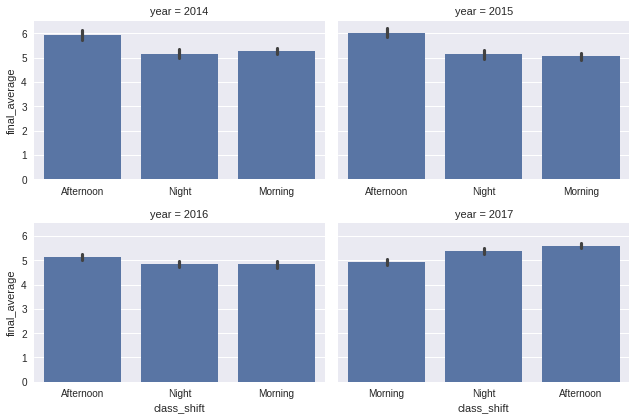

In [83]:
# Showing average by year and class_shift
shift_Analysis.pivot_table(index = ["year","class_shift"], 
                           values = "final_average", 
                           aggfunc = "mean")#.sort_values('final_average')

shift_show = shift_Analysis.reset_index()

shift_average= sns.FacetGrid(shift_show , col = "year",col_wrap = 2, size=3, aspect = 1.5, sharex=False)
shift_average.map(sns.barplot,"class_shift", "final_average")
  
plt.show()

<p>Seeing all years, we can see that **afternoon shift has better averages**. It might mean something, since morning shift starts at 7 am, which means that students may go tired to class. UFRN is a central federal university, a lot of students come from a lot of cities around, then they have to wake up early to get there at last at 7:15 am. So the class shift may interfer in student yield.

###2.5.4 Teacher's experience

<p>This session was created to see if when the teacher was admited has influence in his students' grades.

In [0]:
admission_Analysis = finalData.pivot_table(index = "admission", 
                      values = "final_average", 
                      aggfunc=np.mean)

admission_Analysis = admission_Analysis.reset_index()


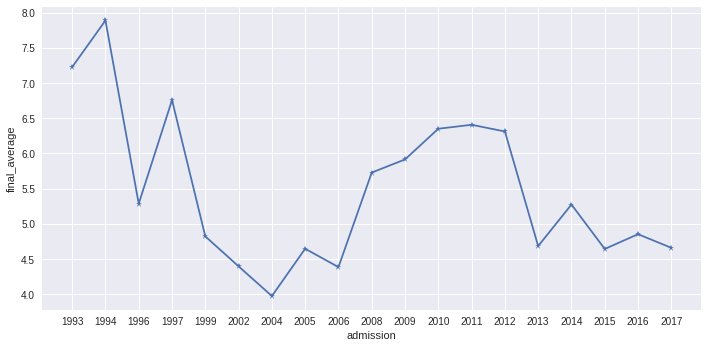

In [86]:
# Here we show how final average change through years
average_admission = sns.FacetGrid(admission_Analysis , size=5, aspect=2, sharex=False)

average_admission.map(plt.plot,"admission","final_average", marker= "*")
  
plt.show()

<p>Seeing the admission from each professor, we can see that those admitted between 1999 and 2007 and between 2013 and 2017 has worse grades. Lately we can see that teachers admitted since 2013 have bad averages. And if we compare the teachers who have recently entered with the older ones, we see that the performance of the students is better with the teachers admitted for longer. Then we can conclude that **experient professors have better averages.**

###2.5.5 Departament offering the class.

<p>Here we study the diference in each departament, IMD or DIMAp.

In [0]:
# Here we create a pivot table to
origin_Analysis_pivot = finalData.pivot_table(index ="unity", 
                      values = "final_average", 
                      aggfunc = np.mean)
origin_Analysis_pivot = origin_Analysis_pivot.reset_index()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


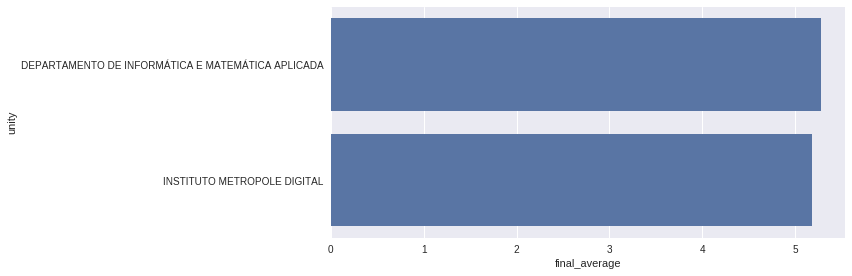

In [90]:
average_origin = sns.FacetGrid(origin_Analysis_pivot, size=4, aspect=3, sharex=False)

average_origin.map(sns.barplot,"final_average", "unity")

  
plt.show()

<p>Taking the departament that the classes were taught, we see not much of a difference between DIMAp and IMD. **DIMAp still has better grades though.**

In [0]:
# Creating a pivot table to show average by year in each departament
origin_Analysis= finalData.pivot_table(index = ["name_subject","unity", "year"],
                      values = "final_average", 
                      aggfunc = np.mean)

origin_Analysis = origin_Analysis.reset_index()

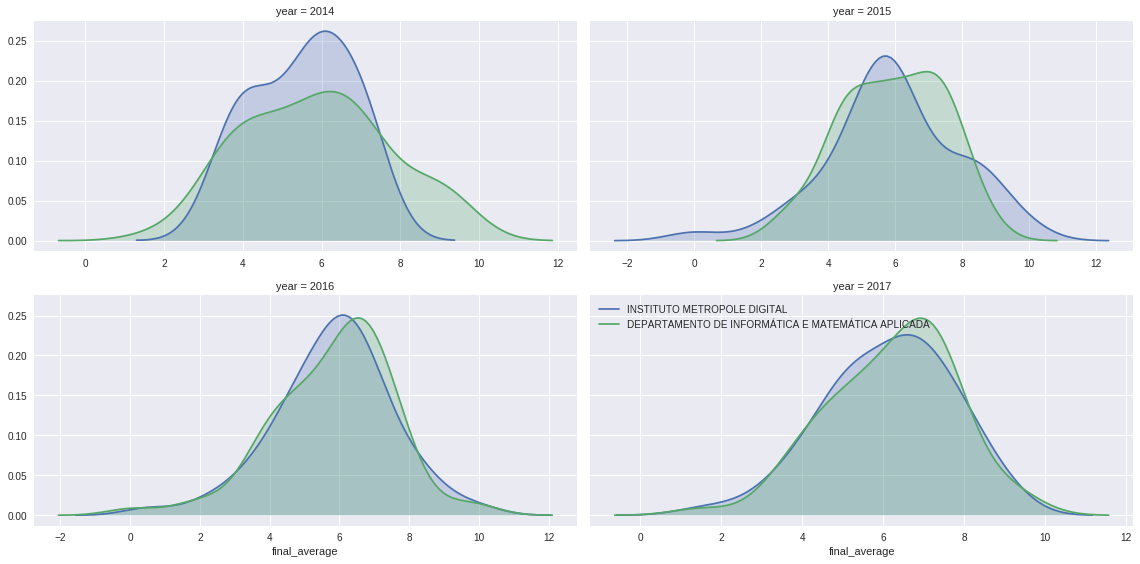

In [92]:
average_origin = sns.FacetGrid(origin_Analysis, col = "year", hue="unity",
                               col_wrap = 2, size=4, aspect=2, sharex=False)

average_origin.map(sns.kdeplot,"final_average", shade = True)
plt.legend(loc=0)
plt.show()

<p>We can see that in 2014 IMD had more students with average betwen 3 and 5, but DIMAp had more students with average above 8. In 2015, we see a changing, IMD now has more students with grades above 8, and DIMAp has more students with average betwen 6 and 8. In 2016 and 2017 we see slight difference betwen those two unities. **But they have basically the same shape now.** About the averages, the most stays betwen 4 and 8.

###2.5.6 Student absences

<p> In this session we are going to see if absences has influence in students' yield.

#### Number of students

In [0]:
absence_analysis = finalData.pivot_table(index = ["description"], values="student", aggfunc = 'count')
absence_analysis = absence_analysis.reset_index() 


disapproved = absence_analysis[absence_analysis.description == 'REPROVADO']
disapproved_by_grades_absences = absence_analysis[absence_analysis.description == 'REPROVADO POR MÉDIA E POR FALTAS']
disapproved_by_grades = absence_analysis[absence_analysis.description == 'REPROVADO POR FALTAS']

absences_pivot = pd.concat([disapproved,disapproved_by_grades_absences])
absences_pivot = pd.concat([absences_pivot, disapproved_by_grades])


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


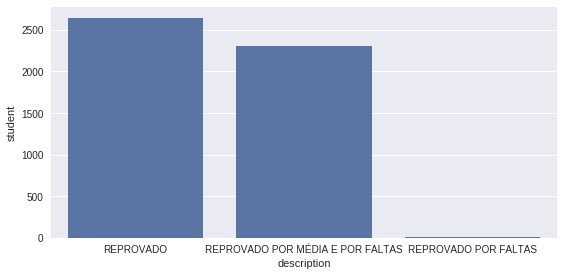

In [95]:
average_absences = sns.FacetGrid(absences_pivot, size=4, aspect=2)
average_absences.map(sns.barplot,"description","student")


In [96]:
absences_percentage = absences_pivot.pivot_table(index = 'description', values= "student", aggfunc = lambda x: 100*(x/(absences_pivot.student.sum())))
absences_percentage = absences_percentage.reset_index()
absences_percentage

,description,student
0,REPROVADO,53.260870
1,REPROVADO POR FALTAS,0.201288
2,REPROVADO POR MÉDIA E POR FALTAS,46.537842


<p>Analyzing the disapprovals, we can see that almost **50% involve faults and poor performance**. While practically **0% only involve absences**, which means that , almost no one that is disaproved by absences manage to get aproved by grades. That is, **people who will fail on absences will probably fail on average as well.**

#### Absences by interval

In [0]:
absences_interval = finalData.pivot_table(index = "absences", 
                      values = "final_average", 
                      aggfunc = np.mean)
absences_interval = absences_interval.reset_index()

In [0]:
# Creating filters to "student_capacity" so we can improve the visualization
def which_abs(row):
    row_a = row['absences']
    if row_a < 10:
        return 10
    elif row_a < 20:
        return 20
    elif row_a < 30:
        return 30
    elif row_a < 40:
        return 40
    elif row_a < 50:
        return 50
    elif row_a < 60:
        return 60      
    elif row_a < 70:
        return 70
    elif row_a < 80:
        return 80
      
absences_interval["abs"] = absences_interval.apply(which_abs, axis=1)



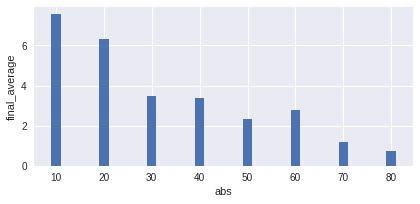

In [99]:
g = sns.FacetGrid(absences_interval, size=3, aspect=2)
g.map(plt.bar,"abs","final_average", width = 2)
  
plt.show()

<p>We can see that **in most cases, as the number of absences increases, the students' final average decreases**. When the number of absences reaches 10, the average number of students is above 6, while when the number of absences exceeds 70, the students' final average is between 0 and 2. This corroborates the fact that: the more students have absenteeism, the more likely their academic yields will decline.

#### Absences by subjects

In [0]:
class_absences = finalData.pivot_table(index = ["name_subject", "class_id"], 
                      values = "absences", 
                      aggfunc = "count")
class_absences = class_absences.reset_index()

class_average = finalData.pivot_table(index = "class_id", 
                      values = "final_average", 
                      aggfunc = np.mean)
class_average = class_average.reset_index()

cols = ['name_subject', 'class_id', "absences", "final_average"]
absences_average = pd.merge(class_absences, class_average, on=['class_id'])[cols]

absences_average = absences_average.sort_values('absences')

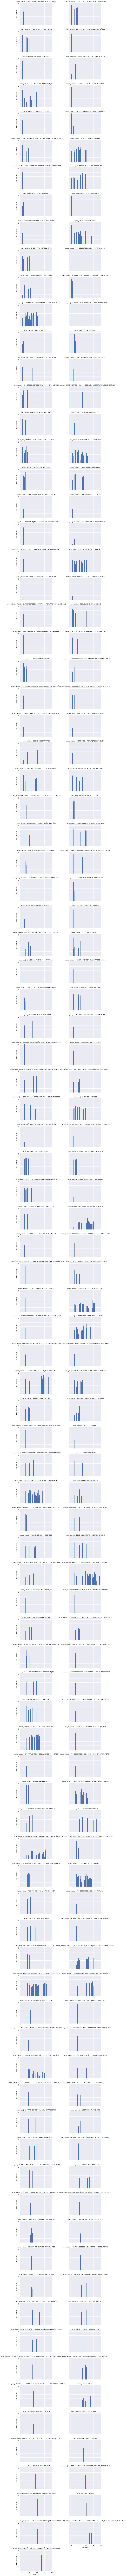

In [101]:
g = sns.FacetGrid(absences_average, col="name_subject", col_wrap=2, size=3, aspect=2)
g.map(plt.bar,"absences","final_average", width = 2)
  
plt.show()

<p>However, considering the number of absences and the final average of the classes of each discipline, not always a greater number of absences coincides with the decrease of the average of the students. This happens because **others factors also influence students' yield, such as the factors we've just discussed.**

# 3. Conclusion

<p>To complete our study, we had to take all that was necessary, prepare them, change what was needed, and filter to only what we were going to use.
<p>When we finished the project, we saw **that classes with few students had better grades**. That the **best class shift was afternoon**. That teachers admitted in 1993, 1994 and 1997 had classes with better grades. That **newest teachers had classes with worst grades**. We also saw that **DIMAp had better grades**, that might mean that the teachers were better at teaching. And at last, we saw that **almost 50% of disapproves had absences as influence.**
<p>As in other forms of knowledge assessment, in the tests we do at the university, **it is not always possible to take into account the individuality and subjectivity of each student.** So in some cases the grades may not reflect the actual potential or performance of the student. In this perspective, **we can not say that there is a way or a solution**, based on these analyzes, **that in 100% of cases will improve the students' performance**. However, we have seen throughout this project that **there are certain factors that are directly related to the average and approval of the students**, in this way, it is possible to develop alternatives that can positively influence the students' yield. It may be interesting for the student himself, for example, consider some of these factors when enrolling in a class, and the same way the institution can think of these factors when defining the classes offered.